In [1]:
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

/home/micky/anaconda3/envs/causal_new/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,concave points_mean,radius_worst,concave points_worst,perimeter_worst,area_mean,perimeter_mean,radius_mean,diagnosis
0,0.429309,0.364519,0.535542,0.392431,0.213584,0.320604,0.305953,1.0
1,0.233319,0.406018,0.427609,0.361139,0.335565,0.411960,0.430264,1.0
2,0.395136,0.345844,0.519059,0.316042,0.279353,0.370308,0.373883,1.0
3,0.461150,0.219003,0.780439,0.212861,0.090760,0.205942,0.185294,1.0
4,0.354198,0.355124,0.381549,0.346380,0.334315,0.431132,0.430384,1.0


In [3]:
df_train = df.head(int(0.8*len(df)))
df_hold = df.tail(int(0.2*len(df)))

In [4]:
sample_20 = df_train.sample(int(0.2*len(df_train)), random_state=2)
sample_40 = df_train.sample(int(0.4*len(df_train)), random_state=2)
sample_60 = df_train.sample(int(0.6*len(df_train)), random_state=2)
sample_80 = df_train.sample(int(0.8*len(df_train)), random_state=2)

In [5]:
sm = from_pandas(df_train,w_threshold=0.8)
sm_20 = from_pandas(sample_20,w_threshold=0.8)
sm_40 = from_pandas(sample_40,w_threshold=0.8)
sm_60 = from_pandas(sample_60,w_threshold=0.8)
sm_80 = from_pandas(sample_80,w_threshold=0.8)

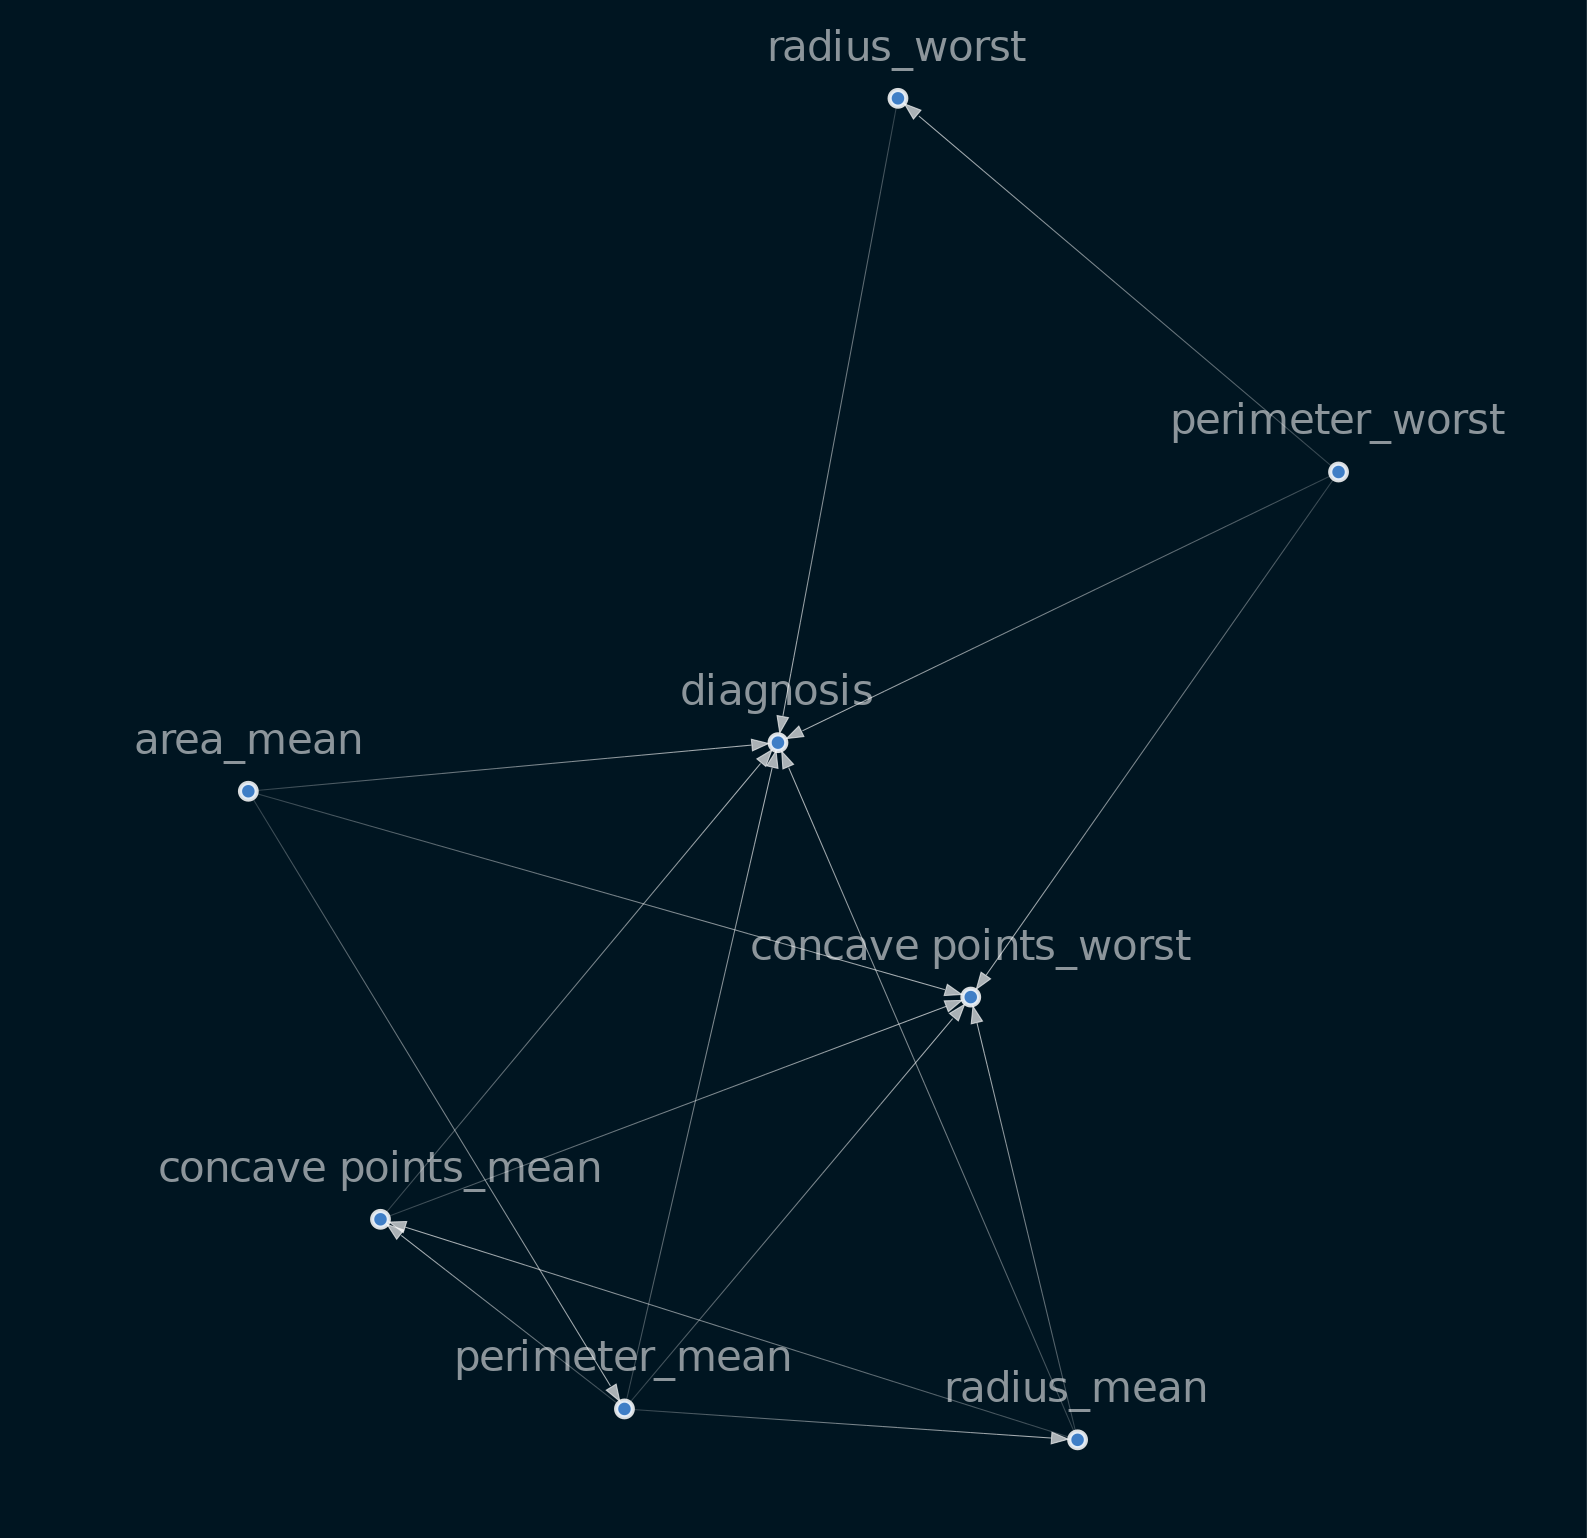

In [11]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [12]:
def jaccard_similarity(g, h):
    a = g.edges
    b = h.edges
    i = set(a).intersection(b)
    result = round(len(i) / (len(a) + len(b) - len(i)),3) 
    print(f'The jaccard simillarity is {result}')

In [17]:
jaccard_similarity(sm,sm_20)

0.833

In [18]:
jaccard_similarity(sm,sm_40)

0.882

In [19]:
jaccard_similarity(sm,sm_60)

0.875

In [20]:
jaccard_similarity(sm,sm_80)

0.938